In [1]:
import os
import numpy as np
import pathlib
import re
from seisflows.tools import specfem

nproc = int(specfem.getpar(key='NPROC', file='./specfem2d_workdir/DATA/Par_file')[1])
nstep = int(specfem.getpar(key='NSTEP', file='./specfem2d_workdir/DATA/Par_file')[1])
dt = float(specfem.getpar(key='DT', file='./specfem2d_workdir/DATA/Par_file')[1])
nrec = int(specfem.getpar(key='nrec', file='./specfem2d_workdir/DATA/Par_file')[1])
xdeb = float(specfem.getpar(key='xdeb', file='./specfem2d_workdir/DATA/Par_file')[1])
xfin = float(specfem.getpar(key='xfin', file='./specfem2d_workdir/DATA/Par_file')[1])
dx = (xfin - xdeb) / (nrec - 1)
P_SV = str(specfem.getpar(key='P_SV', file='./specfem2d_workdir/DATA/Par_file')[1])



In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

def getData(traces_x, traces_y, traces_z, P_SV=True):
    trace_x, trace_y, trace_z = [], [], []

    if P_SV:
        for trace in traces_x:
            trace_x.append(np.loadtxt(trace)[:, 1])
        for trace in traces_z:
            trace_z.append(np.loadtxt(trace)[:, 1])

        T = np.loadtxt(trace)[:,0]
        trace_x = np.array(trace_x).T
        trace_z = np.array(trace_z).T     # (nt, nx)
        X = np.arange(0, trace_x.shape[1])
        norm_x = trace_x / np.max(np.abs(trace_x), axis=0)
        norm_z = trace_z / np.max(np.abs(trace_z), axis=0)
    else:
        for trace in traces_y:
            trace_y.append(np.loadtxt(trace)[:, 1])

        T = np.loadtxt(trace)[:,0]
        trace_y = np.array(trace_y).T
        X = np.arange(0, trace_y.shape[1])
        norm_y = trace_y / np.max(np.abs(trace_y), axis=0)


    if P_SV:
        data = trace_z
    else:
        data = trace_y
        
    return data, T, X


def plot_traces(traces_x, traces_y, traces_z, i, ax, title='hello', P_SV=True):
    trace_x, trace_y, trace_z = [], [], []

    if P_SV:
        for trace in traces_x:
            trace_x.append(np.loadtxt(trace)[:, 1])
        for trace in traces_z:
            trace_z.append(np.loadtxt(trace)[:, 1])

        T = np.loadtxt(trace)[:,0]
        trace_x = np.array(trace_x).T
        trace_z = np.array(trace_z).T     # (nt, nx)
        X = np.arange(0, trace_x.shape[1])
        norm_x = trace_x / np.max(np.abs(trace_x), axis=0)
        norm_z = trace_z / np.max(np.abs(trace_z), axis=0)
    else:
        for trace in traces_y:
            trace_y.append(np.loadtxt(trace)[:, 1])

        T = np.loadtxt(trace)[:,0]
        trace_y = np.array(trace_y).T
        X = np.arange(0, trace_y.shape[1])
        norm_y = trace_y / np.max(np.abs(trace_y), axis=0)

    if P_SV:
        data = trace_z
    else:
        data = trace_y

    im = ax.plot(T, data[:, i], label=title)
    ax.set_xlabel('Offset (m)')
    ax.set_ylabel('Time (s)')

    return ax


def imshow_traces(data, T, X, ax, title='hello', P_SV=True):
    # # bilinear, hanning, spline16, quadric, bicubic
    im = ax.imshow(data, aspect='auto', cmap='seismic', 
                extent=[0, X[-1]*dx, T[-1]*dt, 0], interpolation='spline16')

    ax.set_title(title)
    ax.set_xlabel('Offset (m)')
    ax.set_ylabel('Time (s)')
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    # ax.grid(linestyle='--',linewidth=2)
    ax.grid(False)
    # fig.colorbar(im, cax=ax)
    # fig.tight_layout()
    # plt.show()
    return ax




In [3]:
traces_path = pathlib.Path('scratch/solver/mainsolver/traces/obs')
obs_x = sorted(traces_path.glob('*.BXX.semd'))
obs_y = sorted(traces_path.glob('*.BXY.semd'))
obs_z = sorted(traces_path.glob('*.BXZ.semd'))

traces_path = pathlib.Path('scratch/solver/mainsolver/traces/syn')
syn_x = sorted(traces_path.glob('*.BXX.semd'))
syn_y = sorted(traces_path.glob('*.BXY.semd'))
syn_z = sorted(traces_path.glob('*.BXZ.semd'))

traces_path = pathlib.Path('scratch/solver/mainsolver/traces/adj')
adj_x = sorted(traces_path.glob('*.BXX.adj'))
adj_y = sorted(traces_path.glob('*.BXY.adj'))
adj_z = sorted(traces_path.glob('*.BXZ.adj'))


obs_data, T, X = getData(obs_x, obs_y, obs_z, P_SV)
syn_data, T, X = getData(syn_x, syn_y, syn_z, P_SV)
adj_data, T, X = getData(adj_x, adj_y, adj_z, P_SV)



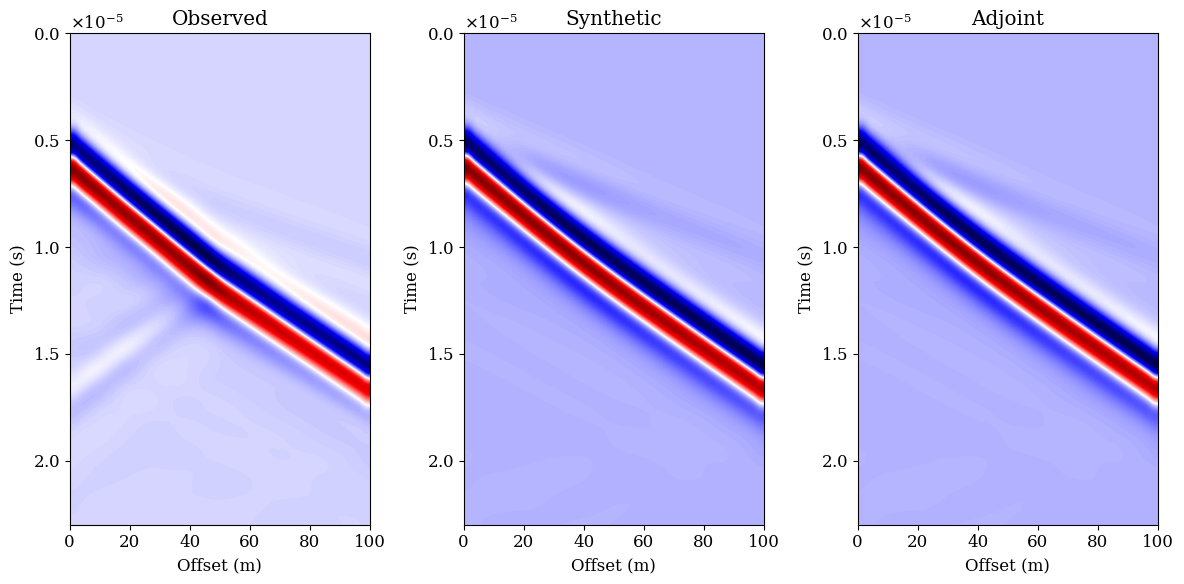

In [5]:
# 设置字体为Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 12
fig, axes = plt.subplots(1, 3, figsize=(12., 6))

i = 10
axes[0] = imshow_traces(obs_data, T, X, axes[0], title='Observed')
axes[1] = imshow_traces(syn_data, T, X, axes[1], title='Synthetic')
axes[2] = imshow_traces(adj_data, T, X, axes[2], title='Adjoint')
fig.tight_layout()
plt.show()

In [5]:
t.max()

0.24995

In [5]:
dt

5e-05

 PlotWig: data range [-0.000559, 0.000754], plotted max 0.000682 



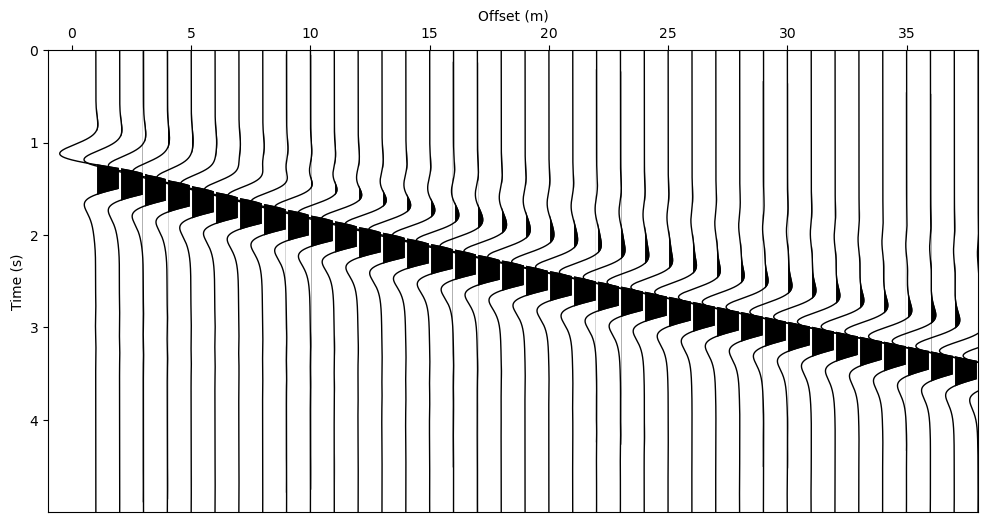

In [4]:
from wigb import wigb



dt = 5e-5
dt = 1.0
dt = 0.001
t = np.arange(0, nstep*dt, dt)

fig, ax = plt.subplots(1, 1, figsize=(12., 6))

wigb(syn_data, z=t, scale=2, ax=ax)


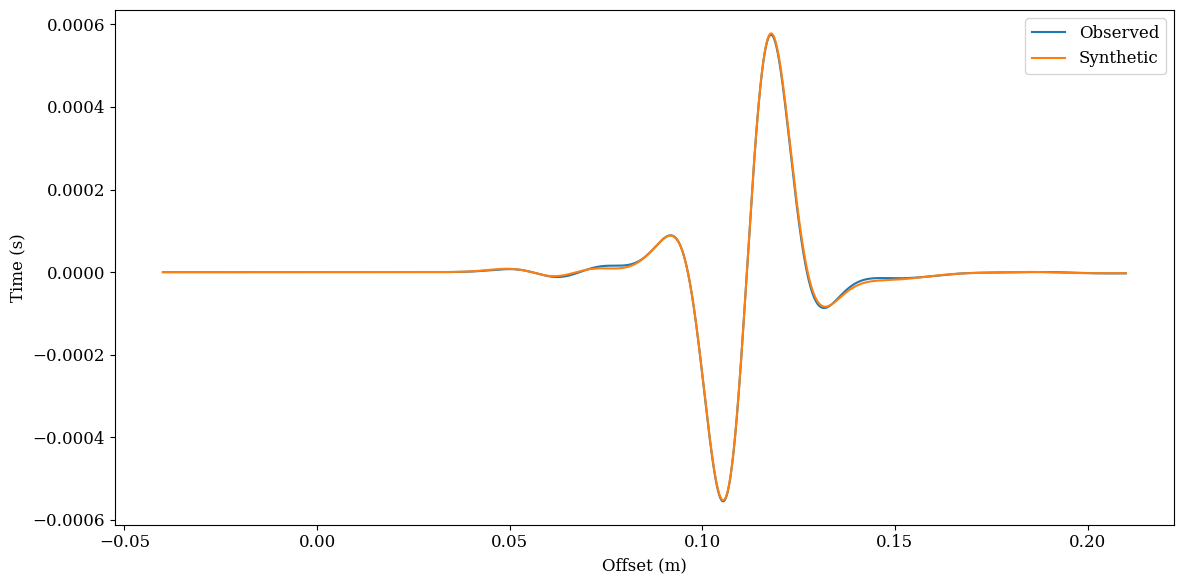

In [159]:
# 设置字体为Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 12
fig, ax = plt.subplots(1, 1, figsize=(12., 6))

i = 30
ax = plot_traces(obs_x, obs_y, obs_z, i, ax, title='Observed')
ax = plot_traces(syn_x, syn_y, syn_z, i, ax, title='Synthetic')
# ax = plot_traces(adj_x, adj_y, adj_z, i, ax, title='Adjoint')
ax.legend()
fig.tight_layout()
plt.show()

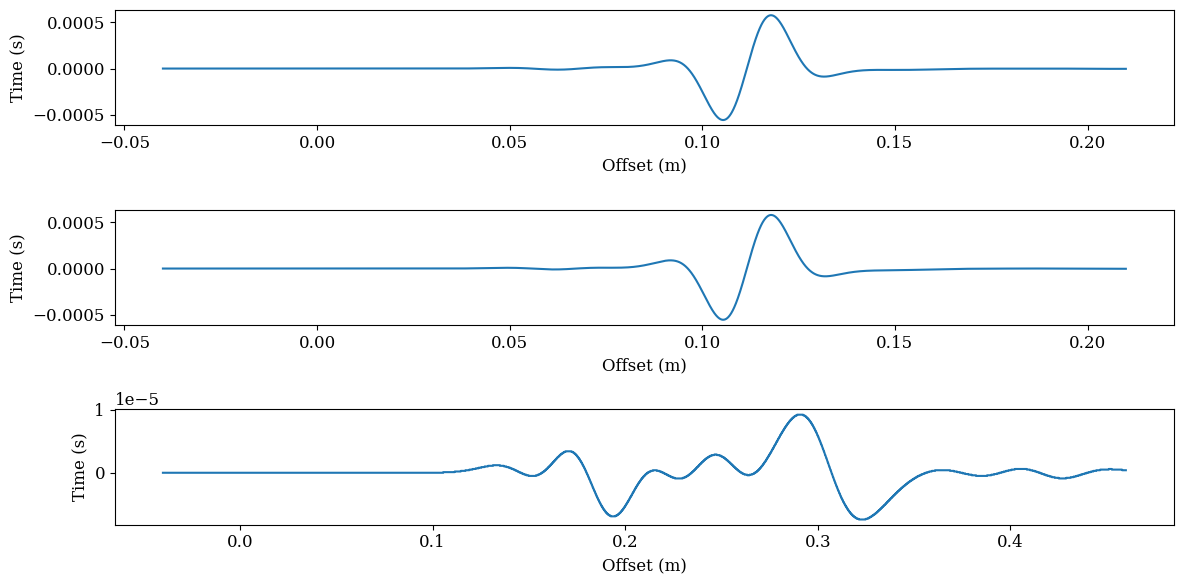

In [160]:
# 设置字体为Times New Roman
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 12
fig, axes = plt.subplots(3, 1, figsize=(12., 6))

i = 30
axes[0] = plot_traces(obs_x, obs_y, obs_z, i, axes[0], title='Observed')
axes[1] = plot_traces(syn_x, syn_y, syn_z, i, axes[1], title='Synthetic')
axes[2] = plot_traces(adj_x, adj_y, adj_z, i, axes[2], title='Adjoint')
fig.tight_layout()
plt.show()

In [168]:
residuals_path = pathlib.Path('scratch/eval_grad/')
residuals = sorted(residuals_path.glob('*.txt'))

for residual in residuals:
    data = np.loadtxt(residual)
    plt.plot(data, label=residual.stem)

plt.show()

In [33]:


dispersions = sorted(pathlib.Path('scratch/preprocess').glob('disper*_Z.txt'))

for dispersion in dispersions:
    data = np.loadtxt(dispersion)


In [34]:
data.shape

(2, 300)

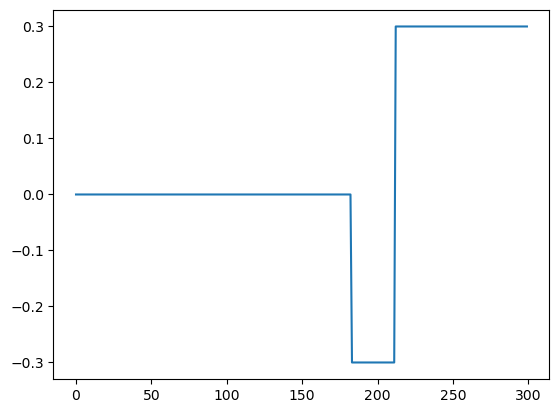

In [36]:
plt.plot(data[0])

In [10]:
data.min(), data.max()

(-0.00023352975608667038, 0.0004413784190546721)

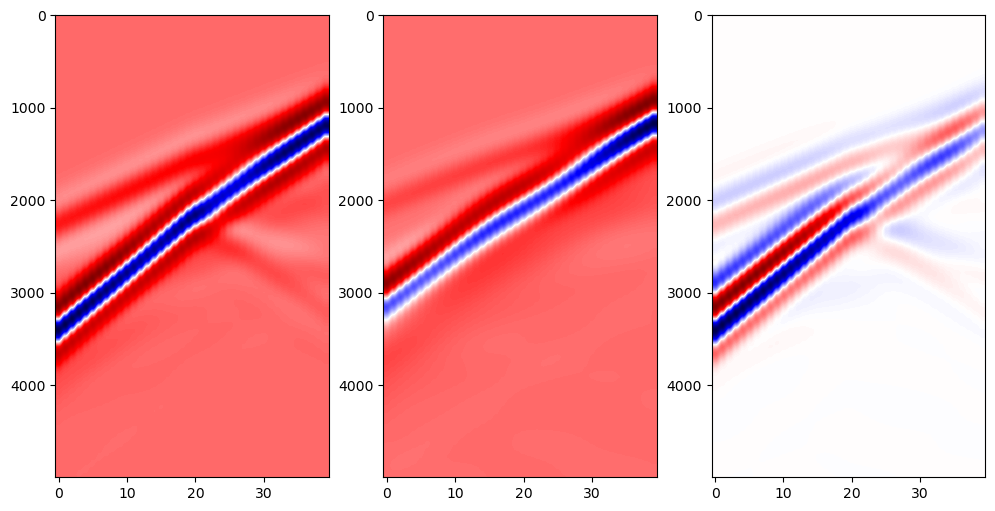

In [38]:
syns = sorted(pathlib.Path('scratch/preprocess/').glob('syn*.txt'))
syn = np.loadtxt(syns[0])
syn.shape

syns = sorted(pathlib.Path('scratch/preprocess/').glob('obs*.txt'))
obs = np.loadtxt(syns[0])
obs.shape

fig, axes = plt.subplots(1, 3, figsize=(12., 6))


axes[0].imshow(obs.T, aspect='auto', cmap='seismic')
axes[1].imshow(syn.T, aspect='auto', cmap='seismic')
axes[2].imshow((obs - syn).T, aspect='auto', cmap='seismic')

/tmp/ipykernel_283244/1911353806.py:4: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  syn_ft = np.loadtxt(syn_fts[0], dtype=np.complex)


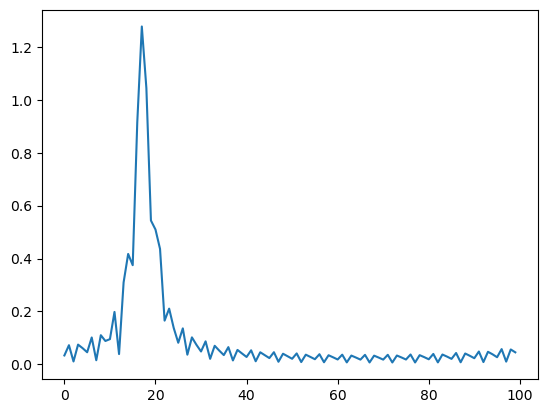

In [49]:
syn_fts = sorted(pathlib.Path('scratch/preprocess/').glob('syn_ft_fx.txt'))

# Use the converter for the appropriate column
syn_ft = np.loadtxt(syn_fts[0], dtype=np.complex)

plt.plot(np.abs(syn_ft))

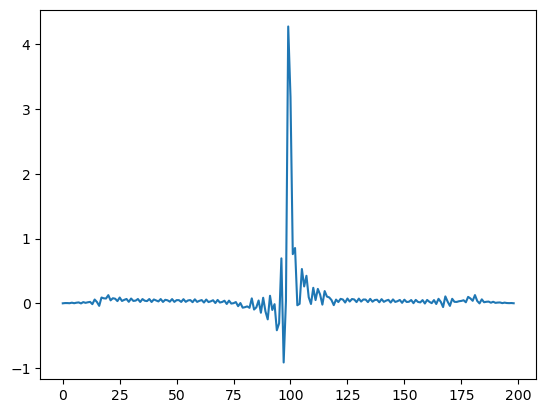

In [52]:
syn_fts = sorted(pathlib.Path('scratch/preprocess/').glob('phicon.txt'))

# Use the converter for the appropriate column
phicon = np.loadtxt(syn_fts[0])

plt.plot(phicon)

In [56]:
syn_fts = sorted(pathlib.Path('scratch/preprocess/').glob('syn_ft_fx_r_*.txt'))

# Use the converter for the appropriate column
# syn_ft = np.loadtxt(syn_fts[0], dtype=np.complex)

# plt.plot(np.abs(syn_ft))

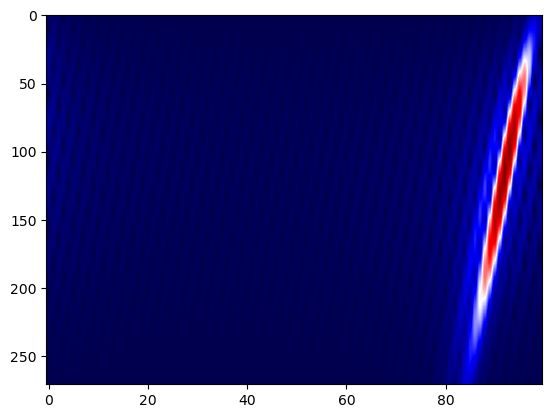

In [67]:
syn_ft = sorted(pathlib.Path('scratch/preprocess/').glob('syn_ft_fx.txt'))
syn_ft_data = np.loadtxt(syn_ft[0], dtype=complex)

plt.imshow(np.abs(syn_ft_data), aspect='auto', cmap='seismic')

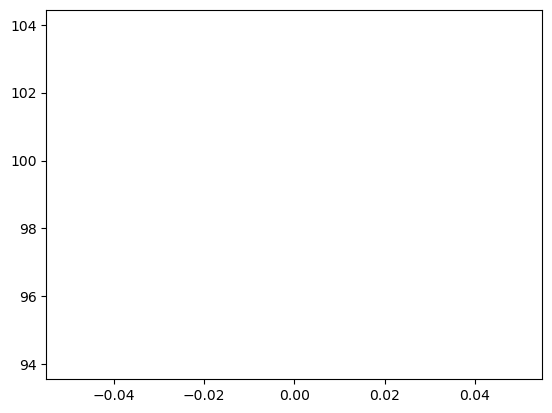

In [54]:
a = np.argmax(phicon)

plt.plot(a)

In [ ]:
syns = sorted(pathlib.Path('scratch/preprocess/').glob('syn*.txt'))
syn = np.loadtxt(syns[0])

In [20]:
trace_x = []
for trace in obs_x:
    trace_x.append(np.loadtxt(trace)[:, 1])

T = np.loadtxt(trace)[:,0]
obs_x = np.array(trace_x).T

In [29]:
dist = sorted(pathlib.Path('scratch/preprocess/').glob('dist.txt'))
dist = np.loadtxt(dist[0])
dist.shape

(40,)

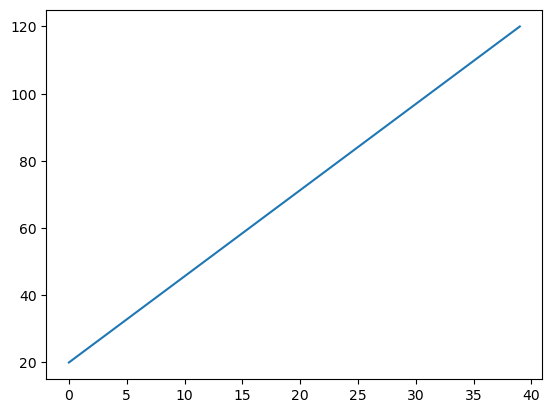

In [30]:
plt.plot(dist)

In [ ]:
dist = sorted(pathlib.Path('scratch/preprocess/').glob('dist.txt'))
dist = np.loadtxt(dist[0])

In [165]:
# from plot_seismology import get_parser, zeroPad, spectrogram

# parser = get_parser()
# args = parser.parse_args(
#     ['./specfem2d_workdir/OUTPUT_FILES/AA.S0026.BXY.semd'])

# from pylab import specgram
# from numpy.fft import rfftfreq, rfft
# import os
# from sys import exit
# import math as M
# from matplotlib.colors import Normalize
# from matplotlib import __version__ as mplVersion
# import numpy as np
# import matplotlib.pyplot as plt

# plot_legend = False
# default_legend = False
# legend_loc = 0
# #'best' 	0
# #'upper right' 	1
# #'upper left' 	2
# #'lower left' 	3
# #'lower right' 	4
# #'right' 	5
# #'center left' 	6
# #'center right' 	7
# #'lower center' 	8
# #'upper center' 	9
# #'center' 	10




# scaleFilesWithFirstOne = args.hold and len(args.files) > 1
# scaleEverything = not scaleFilesWithFirstOne
# factorFirstFile = 1.0 # If scaleFilesWithFirstOne this will be used to scale the second file with respect to the first one
# factorSecondFile = 1.0


